In [1]:
# importing lib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
import seaborn as sb

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:
# importing custom library 
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

# Exploratory data analysis

In [5]:
# reading file
df_am = pd.read_csv('../data/Amharic News Dataset.csv')

# view shuffled info
df_am = shuffle(df_am)
df_am.head(10)

,headline,category,date,views,article,link
41504,የኦባማና የኃይለማርያም ጋዜጣዊ መግለጫ,ዓለም አቀፍ ዜና,"July 28, 2015",Unknown,በኢትዮጵያ ቀጣይ ዕድገት ሊኖር የሚችለው በመረጃዎች ፍሰትና በግልፅ የሃ...,https://amharic.voanews.com//a/president-barac...
48489,በበጀት ዓመቱ 326 ፕሮጄክቶች በአርብቶ አደር አካባቢዎች ተገነቡ,ፖለቲካ,"July 30, 2013",Unknown,አዲስ አበባ ፣ ሐምሌ 23 2005 (ዋኢማ) – በተጠናቀቀው የ2005 በጀ...,https://waltainfo.com/am/27949/
8540,በኢትዮጵያና በግብጽ መካከል ጦርነት መቀስቀስ ተቀባይነት የለውም ብለዋል ...,ፖለቲካ,2021/1/22 20:38 GMT,Unknown,የኢትዮጵያ ውጭ ጉዳይ ሚኒስትር ገዱ አንዳርጋቸው የአሜሪካ ፕሬዘዳንት ዶና...,https://am.al-ain.com/article/ethiopian-fm-sum...
43391,በኢትዮጵያ በተለያዩ ግጭቶች ለተፈናቀሉ ዜጎች የተመድ የ15 ሚሊየን ዶላር...,ሀገር አቀፍ ዜና,"July 13, 2018",Unknown,ባለፉት ጊዚያት በኢትየጵያ የተለያዩ አካባቢዎች በተከሰቱ ግጭቶች ለተፈናቀ...,https://waltainfo.com/am/32021/
18650,ከ7 ነጥብ 7 ሚሊየን ብር በላይ የሚገመት የኮንትሮባንድ እቃና ዶላር ተያዘ,ሀገር አቀፍ ዜና,"Dec 17, 2019",54,አዲስ አበባ ፣ ታህሳስ 1 ፣ 2012 (ኤፍ ቢ ሲ) ከ7 ነጥብ 7 ሚሊየን...,https://www.fanabc.com/%e1%8a%a87-%e1%8a%90%e1...
39925,አጥፍቶ ጠፊዎች ሰሜናዊ ሊብያ ውስጥ በሚገኝ የነዳጅ ማውጫ ተቋም ላይ ጥቃ...,ዓለም አቀፍ ዜና,"January 05, 2016",Unknown,እሥላማዊ መንግሥት ነኝ የሚለው ቡድን አጥፍቶ ጠፊዎች ሰሜናዊ ሊብያ ውስጥ...,https://amharic.voanews.com//a/islamic-state-l...
29715,ቶኪዮ 2020| ለሉሲዎቹ ዝግጅት 23 ተጫዋቾች ተጠርተዋል,ስፖርት,"August 6, 2019",Unknown,በ2020 የቶኪዮ ኦሊምፒክ የሴቶች እግርኳስ የአፍሪካ ዞን ማጣርያ ካሜሩን...,https://soccerethiopia.net/football/49712
11490,ከአማራ ብሄራዊ ሀገር አቀፍ ዜና መንግስት በወቅታዊ ጉዳይ ላይ የተሰጠ መግለጫ,ሀገር አቀፍ ዜና,"October 3, 2019",173,“ የአማራ ብሎም የሀገራችን ህዝቦች የለውጥና የአንድነት ጉዞ በአሮጌው ዘ...,https://www.amharaweb.com/%e1%8a%a8%e1%8a%a0%e...
31400,የአሸናፊዎች አሸናፊ ዋንጫ ጨዋታ ከሊጉ መጀመር አንድ ሳምንት በፊት ይደረጋል,ስፖርት,"September 18, 2018",Unknown,ማክሰኞ መስከረም 8 ቀን 2011የኢትዮጵያ አሸናፊዎች አሸናፊ ዋንጫ ከሊጉ...,https://soccerethiopia.net/football/39761
43011,ጠቅላይ ሚኒስትር ዶ/ር አብይ ነገ የሚከበረውን የኢሬቻ በዓልን ምክንያት ...,ሀገር አቀፍ ዜና,"September 29, 2018",Unknown,የኢፌዴሪ ጠቅላይ ሚኒስትር ዶክተር አብይ አህመድ ነገ የሚከበረውን የኢሬቻ...,https://waltainfo.com/am/32096/


In [6]:
# information
df_info = DataInfo(df_am)

In [7]:
# shape of the data source
df_info.shape_df()

Dataframe contains 51483 rows and 6 columns


In [8]:
# null
df_info.get_count_null()

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64


Only 14 records are nulls, will be dealt with in a proper manner

In [9]:
# really few null values
df_info.null_percentage()

Dataframe contains null values of 0.0% out of the given dataset


Almost 0 percent nulls

In [10]:
#General info
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 41504 to 9193
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB
None


## Data cleaning
- Null values need to be handled 
- view variable datatype need to be int

In [11]:
# dropping the null values
df_am.dropna(inplace = True)

Dropped the null values, since they were very small in number

In [12]:
df_am.isna().any().sum()

0

Finally no null values in the data frame

In [13]:
df_am['link'].value_counts()

https://amharic.voanews.com//a/ethiopian-airlines-flight-et-302-boeing-737-max-8-crash-at-bishofu/4822249.html                                                                                                                                                                                                                                                                                                                                                        3
https://amharic.voanews.com//a/families-react-to-boeing-promises-millions-of-dollars-aid-voa-with-alula-kebede-7-24-2019/5013568.html                                                                                                                                                                                                                                                                                                                                 3
https://amharic.voanews.com//a/white-house-on-river-nile-and-ethiopias-dam-10-03-19/5110

Most news were taken from VOA(Voice of America) news

## let's see some distributions  

In [14]:
df_am.columns

Index(['headline', 'category', 'date', 'views', 'article', 'link'], dtype='object')

There are 6 features in the data frame

In [15]:
df_am['category'].value_counts()

ሀገር አቀፍ ዜና    20665
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            632
Name: category, dtype: int64

There are 6 different news categories

Adding word count (length) of the sentences as a feature

In [16]:
df_am['word_len'] = df_am['article'].str.split().str.len()

In [17]:
df_am.head(10)

,headline,category,date,views,article,link,word_len
41504,የኦባማና የኃይለማርያም ጋዜጣዊ መግለጫ,ዓለም አቀፍ ዜና,"July 28, 2015",Unknown,በኢትዮጵያ ቀጣይ ዕድገት ሊኖር የሚችለው በመረጃዎች ፍሰትና በግልፅ የሃ...,https://amharic.voanews.com//a/president-barac...,274
48489,በበጀት ዓመቱ 326 ፕሮጄክቶች በአርብቶ አደር አካባቢዎች ተገነቡ,ፖለቲካ,"July 30, 2013",Unknown,አዲስ አበባ ፣ ሐምሌ 23 2005 (ዋኢማ) – በተጠናቀቀው የ2005 በጀ...,https://waltainfo.com/am/27949/,140
8540,በኢትዮጵያና በግብጽ መካከል ጦርነት መቀስቀስ ተቀባይነት የለውም ብለዋል ...,ፖለቲካ,2021/1/22 20:38 GMT,Unknown,የኢትዮጵያ ውጭ ጉዳይ ሚኒስትር ገዱ አንዳርጋቸው የአሜሪካ ፕሬዘዳንት ዶና...,https://am.al-ain.com/article/ethiopian-fm-sum...,140
43391,በኢትዮጵያ በተለያዩ ግጭቶች ለተፈናቀሉ ዜጎች የተመድ የ15 ሚሊየን ዶላር...,ሀገር አቀፍ ዜና,"July 13, 2018",Unknown,ባለፉት ጊዚያት በኢትየጵያ የተለያዩ አካባቢዎች በተከሰቱ ግጭቶች ለተፈናቀ...,https://waltainfo.com/am/32021/,83
18650,ከ7 ነጥብ 7 ሚሊየን ብር በላይ የሚገመት የኮንትሮባንድ እቃና ዶላር ተያዘ,ሀገር አቀፍ ዜና,"Dec 17, 2019",54,አዲስ አበባ ፣ ታህሳስ 1 ፣ 2012 (ኤፍ ቢ ሲ) ከ7 ነጥብ 7 ሚሊየን...,https://www.fanabc.com/%e1%8a%a87-%e1%8a%90%e1...,132
39925,አጥፍቶ ጠፊዎች ሰሜናዊ ሊብያ ውስጥ በሚገኝ የነዳጅ ማውጫ ተቋም ላይ ጥቃ...,ዓለም አቀፍ ዜና,"January 05, 2016",Unknown,እሥላማዊ መንግሥት ነኝ የሚለው ቡድን አጥፍቶ ጠፊዎች ሰሜናዊ ሊብያ ውስጥ...,https://amharic.voanews.com//a/islamic-state-l...,68
29715,ቶኪዮ 2020| ለሉሲዎቹ ዝግጅት 23 ተጫዋቾች ተጠርተዋል,ስፖርት,"August 6, 2019",Unknown,በ2020 የቶኪዮ ኦሊምፒክ የሴቶች እግርኳስ የአፍሪካ ዞን ማጣርያ ካሜሩን...,https://soccerethiopia.net/football/49712,144
11490,ከአማራ ብሄራዊ ሀገር አቀፍ ዜና መንግስት በወቅታዊ ጉዳይ ላይ የተሰጠ መግለጫ,ሀገር አቀፍ ዜና,"October 3, 2019",173,“ የአማራ ብሎም የሀገራችን ህዝቦች የለውጥና የአንድነት ጉዞ በአሮጌው ዘ...,https://www.amharaweb.com/%e1%8a%a8%e1%8a%a0%e...,479
31400,የአሸናፊዎች አሸናፊ ዋንጫ ጨዋታ ከሊጉ መጀመር አንድ ሳምንት በፊት ይደረጋል,ስፖርት,"September 18, 2018",Unknown,ማክሰኞ መስከረም 8 ቀን 2011የኢትዮጵያ አሸናፊዎች አሸናፊ ዋንጫ ከሊጉ...,https://soccerethiopia.net/football/39761,122
43011,ጠቅላይ ሚኒስትር ዶ/ር አብይ ነገ የሚከበረውን የኢሬቻ በዓልን ምክንያት ...,ሀገር አቀፍ ዜና,"September 29, 2018",Unknown,የኢፌዴሪ ጠቅላይ ሚኒስትር ዶክተር አብይ አህመድ ነገ የሚከበረውን የኢሬቻ...,https://waltainfo.com/am/32096/,317


Word length feature has been appended

In [18]:
df_am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51470 entries, 41504 to 9193
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51470 non-null  object
 2   date      51470 non-null  object
 3   views     51470 non-null  object
 4   article   51470 non-null  object
 5   link      51470 non-null  object
 6   word_len  51470 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


## Character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ'

In [19]:
import re
#method to normalize character level mismatch such as ጸሀይ and ፀሐይ
def normalize_char_level_mismatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48

In [20]:
df_am['article'] = df_am['article'].str.replace('[^\w\s]','')

In [21]:
df_am['article'] = df_am['article'].apply(lambda x: normalize_char_level_mismatch(x))

Applied character level normalizations

In [22]:
n_data = df_am[['article','category']]
text,label = df_am['article'].values, df_am['category'].values
n_data.head()

,article,category
41504,በኢትዮጵያ ቀጣይ እድገት ሊኖር የሚችለው በመረጃዎች ፍሰትና በግልፅ የሀ...,ዓለም አቀፍ ዜና
48489,አዲስ አበባ ሀምሌ 23 2005 ዋኢማ በተጠናቀቀው የ2005 በጀት አመ...,ፖለቲካ
8540,የኢትዮጵያ ውጭ ጉዳይ ሚኒስትር ገዱ አንዳርጋቸው የአሜሪካ ፕሬዘዳንት ዶና...,ፖለቲካ
43391,ባለፉት ጊዚያት በኢትየጵያ የተለያዩ አካባቢዎች በተከሰቱ ግጭቶች ለተፈናቀ...,ሀገር አቀፍ ዜና
18650,አዲስ አበባ ታህሳስ 1 2012 ኤፍ ቢ ሲ ከ7 ነጥብ 7 ሚሊየን ብር ...,ሀገር አቀፍ ዜና


In [23]:
n_data.to_csv('../data/article_and_category.csv', index=False)

Refactored and saved the article and category features

In [24]:
# the notebook is rendering the amharic text 
# so it should be replaced with english words 
df_am['category'] = df_am['category'].replace(['ሀገር አቀፍ ዜና', 'ስፖርት', 'ፖለቲካ', 'ዓለም አቀፍ ዜና','ቢዝነስ','መዝናኛ'], ['NationWide News', 'Sport', 'Politics', 'Worldwide News','Business','Entertainment'])

> the dataset contains mostly about news agency and sports

### Data sets are strings which contains long sentences 
>- Needs to change into more manageble and seuitable for analysis
>- the string length method would be applied
>- So the article and headline will be converted here(these variables are the most interested feature for the project)

In [25]:
# creating new dataframe based on the existed dataframe
df_am_clean=pd.DataFrame()
df_am_clean['article_char_word'] = df_am['article'].str.len()
df_am_clean['article_word_length'] = df_am['article'].str.split().str.len()
df_am_clean['headline_char_length'] = df_am['headline'].str.len()
df_am_clean['headline_word_length'] = df_am['headline'].str.split().str.len()
df_am_clean['category'] = df_am['category']


In [26]:
df_am.head(2)

,headline,category,date,views,article,link,word_len
41504,የኦባማና የኃይለማርያም ጋዜጣዊ መግለጫ,Worldwide News,"July 28, 2015",Unknown,በኢትዮጵያ ቀጣይ እድገት ሊኖር የሚችለው በመረጃዎች ፍሰትና በግልፅ የሀ...,https://amharic.voanews.com//a/president-barac...,274
48489,በበጀት ዓመቱ 326 ፕሮጄክቶች በአርብቶ አደር አካባቢዎች ተገነቡ,Politics,"July 30, 2013",Unknown,አዲስ አበባ ሀምሌ 23 2005 ዋኢማ በተጠናቀቀው የ2005 በጀት አመ...,https://waltainfo.com/am/27949/,140


In [27]:
df_am_clean.head(2)

,article_char_word,article_word_length,headline_char_length,headline_word_length,category
41504,1527,274,24,4,Worldwide News
48489,719,138,41,8,Politics


The transformed data set for making visualizations

In [28]:
df_am_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51470 entries, 41504 to 9193
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   article_char_word     51470 non-null  int64 
 1   article_word_length   51470 non-null  int64 
 2   headline_char_length  51470 non-null  int64 
 3   headline_word_length  51470 non-null  int64 
 4   category              51470 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


## Visualizers

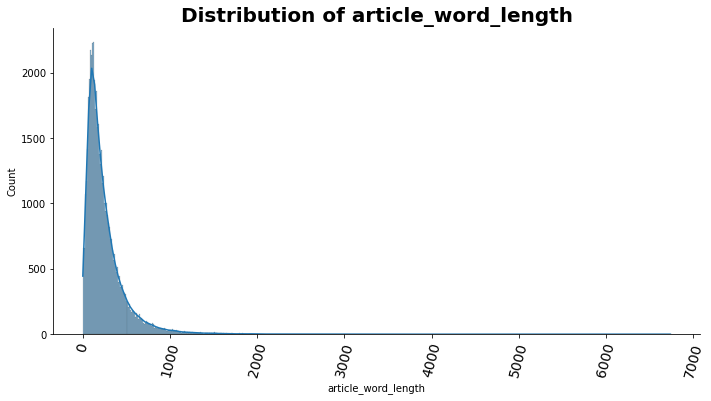

In [29]:
# distribution of 
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_word_length', color)

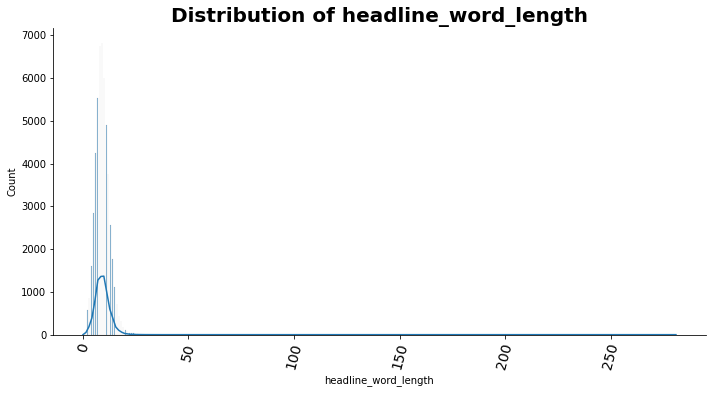

In [30]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_word_length', color)

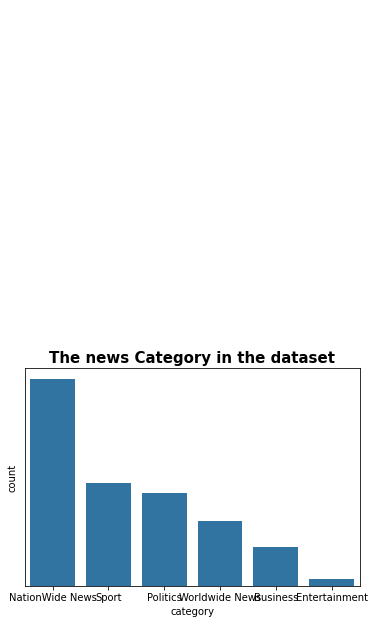

In [31]:
# The distribution of news Category in the dataset
plt.title("The news Category in the dataset", size=15, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_am_clean, df_am_clean['category'])

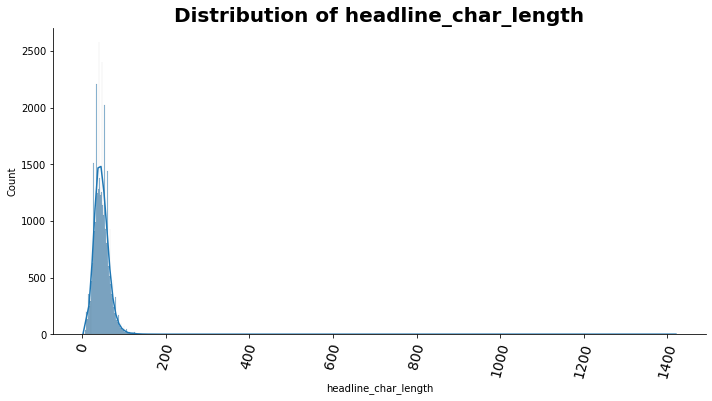

In [32]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'headline_char_length', color)

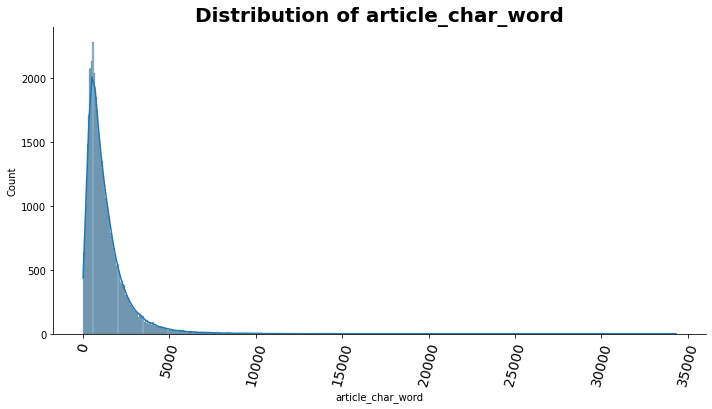

In [33]:
color= base_color = sb.color_palette()[0]
VisualiseDf.plot_hist(df_am_clean, 'article_char_word', color)

### Headline analysis on each category news

<AxesSubplot:xlabel='headline_word_length', ylabel='count'>

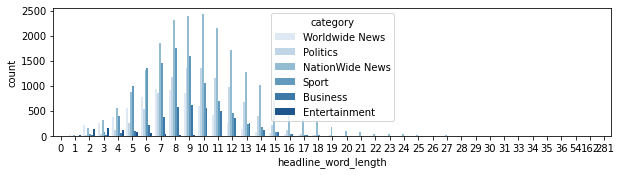

In [34]:
plt.figure(figsize = [10, 8])
plt.subplot(3, 1, 1)
sb.countplot(data = df_am_clean, x = 'headline_word_length', hue = 'category', palette = 'Blues')

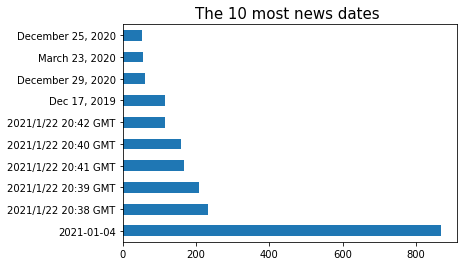

In [35]:
# Distribution of dates in terms of broadcasted news 
plt.title(f'The 10 most news dates ', fontsize=15)
df_am.date.value_counts(ascending = False).head(10).plot(kind ='barh');

> ### Article analysis on each category news

In [36]:
#ax = plt.subplot(3, 1, 2)
#sb.countplot(data = df_am_clean, x = 'article_char_word', hue = 'category', palette = 'Blues')
#ax.legend(ncol = 4) 

In [37]:
df_am.to_csv('../data/Amharic News Dataset.csv', index=False)